In [117]:
import time
import numpy as np
import pandas as pd
import random
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Geradores de arrays

In [179]:
def vector_unsorted(vector_len):
    vector_desorganized =[]
    for each in range(vector_len):
        vector_desorganized.append(randint(0,999))
    return vector_desorganized


def vector_sorted(vector_len):
    vector_organized =[]
    for each in range(vector_len):
        vector_organized.append(each)
    return vector_organized


def vector_semi_unsorted(vector_len):
    vector_semi_desorganized =[]
    for each in range(vector_len):
        if each <= int(vector_len/2.0):
            vector_semi_desorganized.append(each)
        else:
            vector_semi_desorganized.append(randint(0,999))
    return vector_semi_desorganized


def vector_decreasing(vector_len):
    vector_decreased = []
    for each in range(vector_len,0,-1):
        vector_decreased.append(each)
    return vector_decreased


def vector_repeater(vector_len):
    vector_repeate = []
    for each in range(vector_len):
        if each <= int(vector_len/2.0):
            vector_repeate.append(each)
        else:
            vector_repeate.append(randint(0,50))
    return vector_repeate

### Merge Sort Recursivo

In [95]:
def merge(array, left, right):
    left_length = len(left)
    right_length = len(right)
    i = 0
    j = 0
    k = 0
    
    while(i < left_length and j < right_length):
        if(left[i] <= right[j]):
            array[k] = left[i]
            i += 1
        else:
            array[k] = right[j]
            j += 1
        k += 1
        
    while(i < left_length):
        array[k] = left[i]
        i += 1
        k += 1
    
    while(j < right_length):
        array[k] = right[j]
        j += 1
        k += 1
        

def mergesort(array):
    n = len(array)
    if(len(array) < 2):
        return
    
    mid = n//2
    left = array[0:mid]
    right = array[mid:n]
    
    mergesort(left)
    mergesort(right)
    merge(array, left, right)
    

def mergesort_timespent(array):
    t0 = time.time()
    mergesort(array)
    t1 = time.time()
    
    return t1 - t0

### Counting Sort

In [96]:
def counting_sort(array):
    maxval = array[0]
    for i in range(len(array)):
        if(array[i] > maxval):
            maxval = array[i]
        
    n = len(array)
    m = maxval + 1
    count = [0] * m
    for a in array:
        count[a] += 1
    i = 0
    for a in range(m):
        for c in range(count[a]):
            array[i] = a
            i += 1
    return array


def counting_sort_timespent(array):
    t0 = time.time()
    counting_sort(array)
    t1 = time.time()
    
    return t1 - t0

### Radix Sort

In [97]:
def radix_sort(random_list):
    len_random_list = len(random_list)
    modulus = 10
    div = 1
    while True:
        new_list = [[], [], [], [], [], [], [], [], [], []]
        for value in random_list:
            least_digit = value % modulus
            least_digit //= div
            new_list[least_digit].append(value)
        modulus = modulus * 10
        div = div * 10

        if len(new_list[0]) == len_random_list:
            return new_list[0]

        random_list = []
        rd_list_append = random_list.append
        for x in new_list:
            for y in x:
                rd_list_append(y)
        


def radix_sort_timespent(array):
    t0 = time.time()
    radix_sort(array)
    t1 = time.time()
    
    return t1 - t0

In [162]:
def generate_timespent_array(func, xAxis):
    timespent = [[], [], []]

    for i in range(1,20):
        xAxis.append(i*10)
        unsortedArray = func(i*10)
        timespent[0].append(mergesort_timespent(unsortedArray))
        timespent[1].append(counting_sort_timespent(unsortedArray))
        timespent[2].append(radix_sort_timespent(unsortedArray))
        
    return timespent


def plot(xAxis, yAxisArray):
    plt.plot(xAxis, np.array(yAxisArray[0]), label="Mergesort")
    plt.plot(xAxis, np.array(yAxisArray[1]), label="Counting Sort")
    plt.plot(xAxis, np.array(yAxisArray[2]), label="Radix Sort")

    plt.legend(loc='upper left')
    plt.ylabel('Tempo Gasto',fontsize=15)
    plt.xlabel('Tamanho do Array',fontsize=15)
    plt.title('Tempo gasto x Tamanho do array',fontsize=15)
    plt.show()
    

def plot_corr(array):
    data = {'Merge Sort': array[0],
        'Counting Sort': array[1],
        'Radix Sort': array[2]}

    df = pd.DataFrame(data)
    df_corr = df.corr()

    fig = plt.subplots(figsize=(7,7))
    ax2=plt.subplot(1,1,1)  
    sns.heatmap(df_corr, annot=True, linewidths=1.5, ax=ax2)
    ax2.set_title("Correlação entre tempo de execução de cada um",fontsize=20)

### Executando algoritmos em arrays com valores distintos e não ordenados

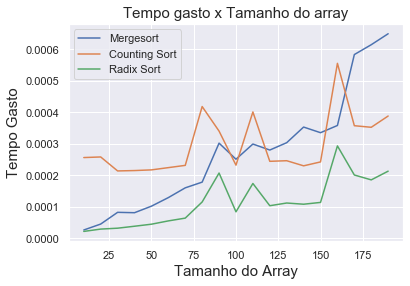

In [153]:
xAxis = []
timespent = generate_timespent_array(vector_unsorted, xAxis)
plot(xAxis, timespent)

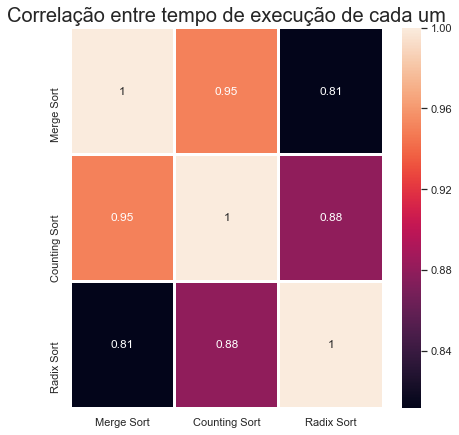

In [163]:
plot_corr(timespent)

### Executando algoritmos em arrays com valores distintos e ordenados

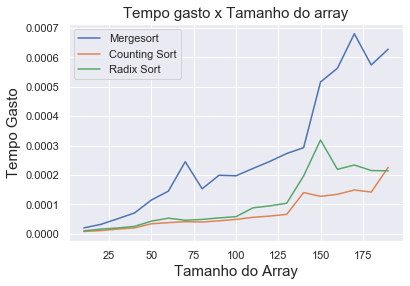

In [165]:
xAxis = []
timespent = generate_timespent_array(vector_sorted, xAxis)
plot(xAxis, timespent)

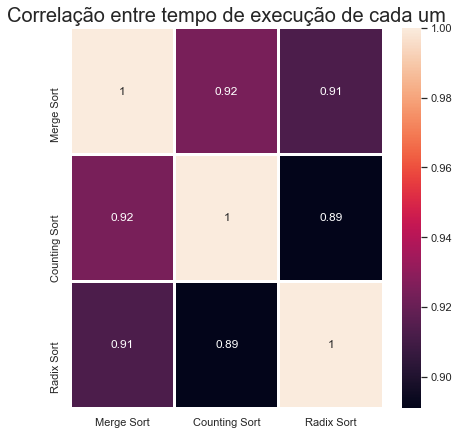

In [166]:
plot_corr(timespent)

### Executando algoritmos em arrays com valores distintos e semi-ordenados

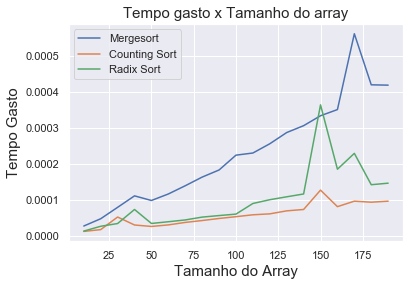

In [167]:
xAxis = []
timespent = generate_timespent_array(vector_sorted, xAxis)
plot(xAxis, timespent)

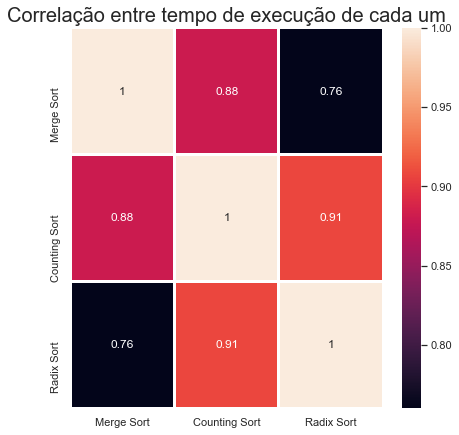

In [168]:
plot_corr(timespent)

### Executando algoritmos em arrays com valores distintos e ordenados em ordem decrescente

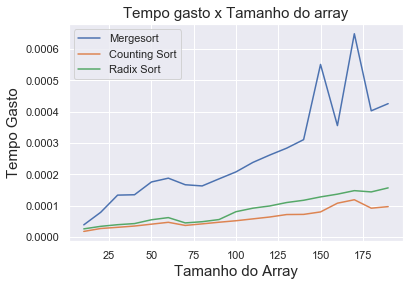

In [174]:
xAxis = []
timespent = generate_timespent_array(vector_decreasing, xAxis)
plot(xAxis, timespent)

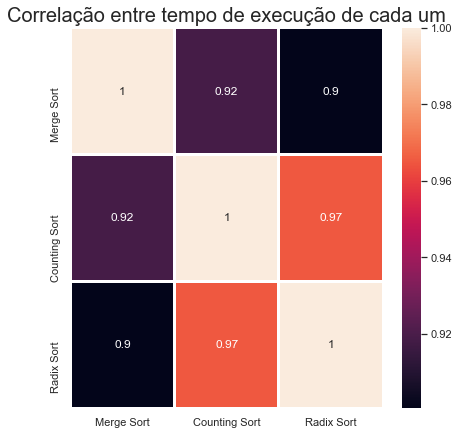

In [175]:
plot_corr(timespent)

### Executando algoritmos em arrays com valores distintos e não ordenados

In [178]:
xAxis = []
timespent = generate_timespent_array(vector_repeater, xAxis)
plot(xAxis, timespent)

TypeError: object of type 'function' has no len()